In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# FedAVG
# data_batchNorm_iid1_unbalanced0 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[1]_unbalanced[0]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
# data_batchNorm_iid0_unbalanced0 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[0]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
# data_batchNorm_iid0_unbalanced1 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[1]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
# data_groupNorm_iid1_unbalanced0 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[1]_unbalanced[0]_E[1]_B[10]_GroupNorm_numGroups[4].csv")
# data_groupNorm_iid0_unbalanced0 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[0]_E[1]_B[10]_GroupNorm_numGroups[4].csv")
# data_groupNorm_iid0_unbalanced1 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[1]_E[1]_B[10]_GroupNorm_numGroups[4].csv")
data_batchNorm_iid1_unbalanced0 = pd.read_csv("fedAVG_results/new_random_seed/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[1]_unbalanced[0]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
data_batchNorm_iid0_unbalanced0 = pd.read_csv("fedAVG_results/new_random_seed/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[0]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
data_batchNorm_iid0_unbalanced1 = pd.read_csv("fedAVG_results/new_random_seed/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[1]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
data_groupNorm_iid1_unbalanced0 = pd.read_csv("fedAVG_results/new_random_seed/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[1]_unbalanced[0]_E[1]_B[10]_GroupNorm_numGroups[4].csv")
data_groupNorm_iid0_unbalanced0 = pd.read_csv("fedAVG_results/new_random_seed/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[0]_E[1]_B[10]_GroupNorm_numGroups[4].csv")
data_groupNorm_iid0_unbalanced1 = pd.read_csv("fedAVG_results/new_random_seed/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[1]_E[1]_B[10]_GroupNorm_numGroups[4].csv")

In [3]:
data_groupNorm_iid1_unbalanced0.head(10)

,Unnamed: 0,train_loss,train_accuracy
0,0,3.487628,0.1020
1,1,2.801506,0.1130
2,2,2.596063,0.1094
3,3,2.528836,0.1488
4,4,2.479602,0.1574
5,5,2.447496,0.1494
6,6,2.418099,0.1820
7,7,2.380921,0.1814
8,8,2.352809,0.1656
9,9,2.330857,0.1912


In [4]:
# BatchNorm
train_loss_batchNorm_iid1_unbalanced0 = list(data_batchNorm_iid1_unbalanced0["train_loss"].values)
train_acc_batchNorm_iid1_unbalanced0 = list(data_batchNorm_iid1_unbalanced0["train_accuracy"].values)

train_loss_batchNorm_iid0_unbalanced0 = list(data_batchNorm_iid0_unbalanced0["train_loss"].values)
train_acc_batchNorm_iid0_unbalanced0 = list(data_batchNorm_iid0_unbalanced0["train_accuracy"].values)

train_loss_batchNorm_iid0_unbalanced1 = list(data_batchNorm_iid0_unbalanced1["train_loss"].values)
train_acc_batchNorm_iid0_unbalanced1 = list(data_batchNorm_iid0_unbalanced1["train_accuracy"].values)

# GroupNorm
train_loss_groupNorm_iid1_unbalanced0 = list(data_groupNorm_iid1_unbalanced0["train_loss"].values)
train_acc_groupNorm_iid1_unbalanced0 = list(data_groupNorm_iid1_unbalanced0["train_accuracy"].values)

train_loss_groupNorm_iid0_unbalanced0 = list(data_groupNorm_iid0_unbalanced0["train_loss"].values)
train_acc_groupNorm_iid0_unbalanced0 = list(data_groupNorm_iid0_unbalanced0["train_accuracy"].values)

train_loss_groupNorm_iid0_unbalanced1 = list(data_groupNorm_iid0_unbalanced1["train_loss"].values)
train_acc_groupNorm_iid0_unbalanced1 = list(data_groupNorm_iid0_unbalanced1["train_accuracy"].values)

# train_loss_groupNorm = list(data_groupNorm["train_loss"].values)
# train_accuracy_groupNorm = list(data_groupNorm["train_accuracy"].values)
# train_loss_batchNorm = list(data_batchNorm["train_loss"].values)
# train_accuracy_batchNorm = list(data_batchNorm["train_accuracy"].values)

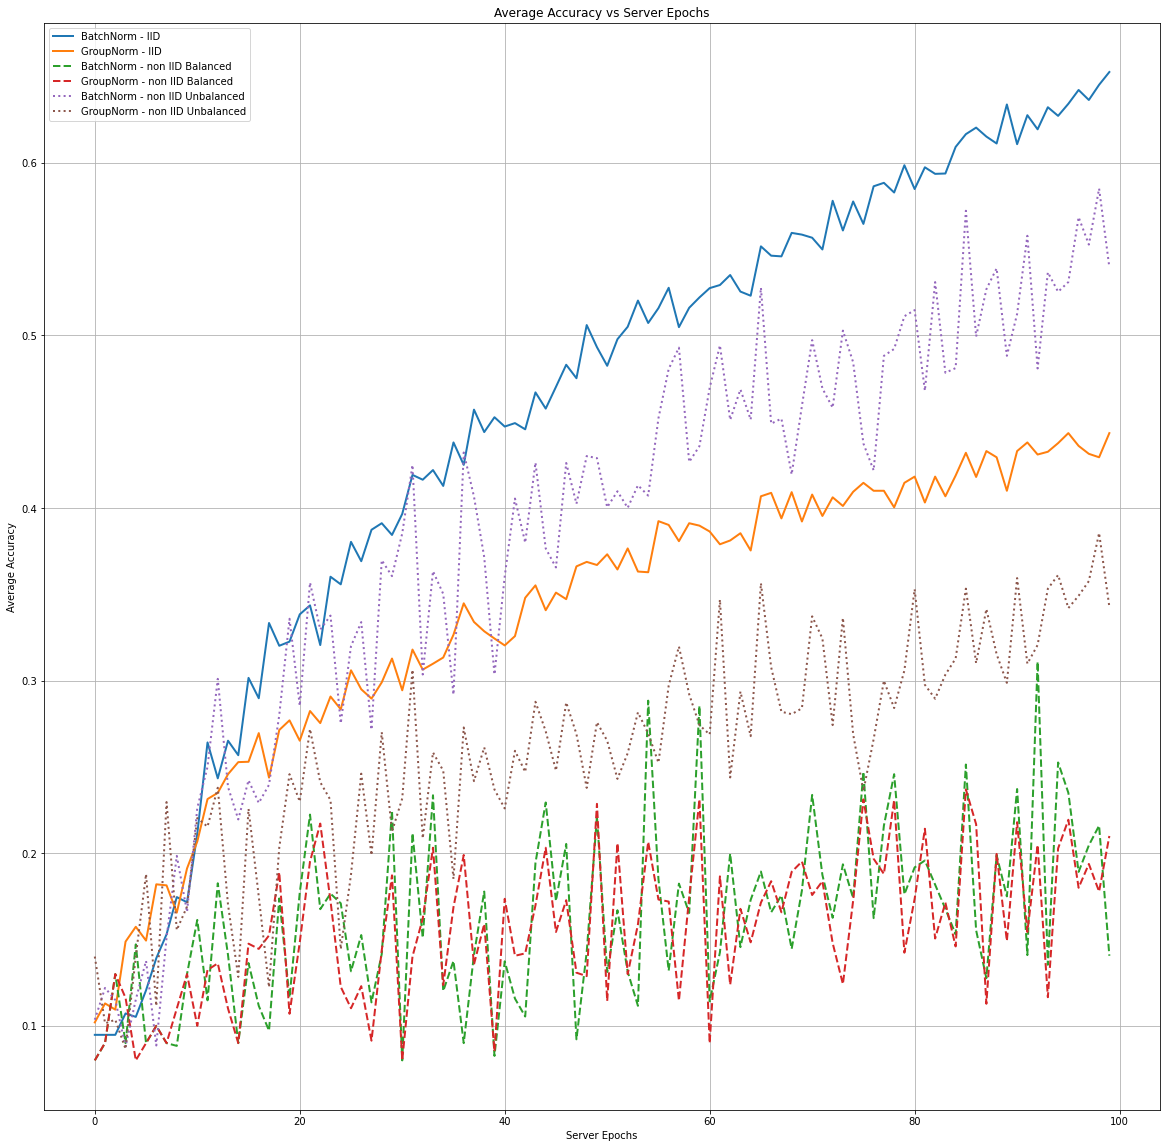

In [5]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.plot(range(len(train_acc_batchNorm_iid1_unbalanced0)), train_acc_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - IID")
ax.plot(range(len(train_acc_groupNorm_iid1_unbalanced0)), train_acc_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - IID")

ax.plot(range(len(train_acc_batchNorm_iid0_unbalanced0)), train_acc_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="BatchNorm - non IID Balanced")
ax.plot(range(len(train_acc_groupNorm_iid0_unbalanced0)), train_acc_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="GroupNorm - non IID Balanced")

ax.plot(range(len(train_acc_batchNorm_iid0_unbalanced1)), train_acc_batchNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="BatchNorm - non IID Unbalanced")
ax.plot(range(len(train_acc_groupNorm_iid0_unbalanced1)), train_acc_groupNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="GroupNorm - non IID Unbalanced")


plt.title("Average Accuracy vs Server Epochs")
plt.ylabel('Average Accuracy')
plt.xlabel('Server Epochs')

ax.legend()
ax.grid()

# file_name = '{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}]_loss.png'.format(
#     "ResNet50", n_epochs, lr, frac, iid,
#     local_epochs, local_batch_size)

# plt.savefig("fedAVG_results/fedAVG_summary_results_accuracy.png")
plt.savefig("fedAVG_results/new_random_seed/fedAVG_summary_results_accuracy.png")

plt.show()

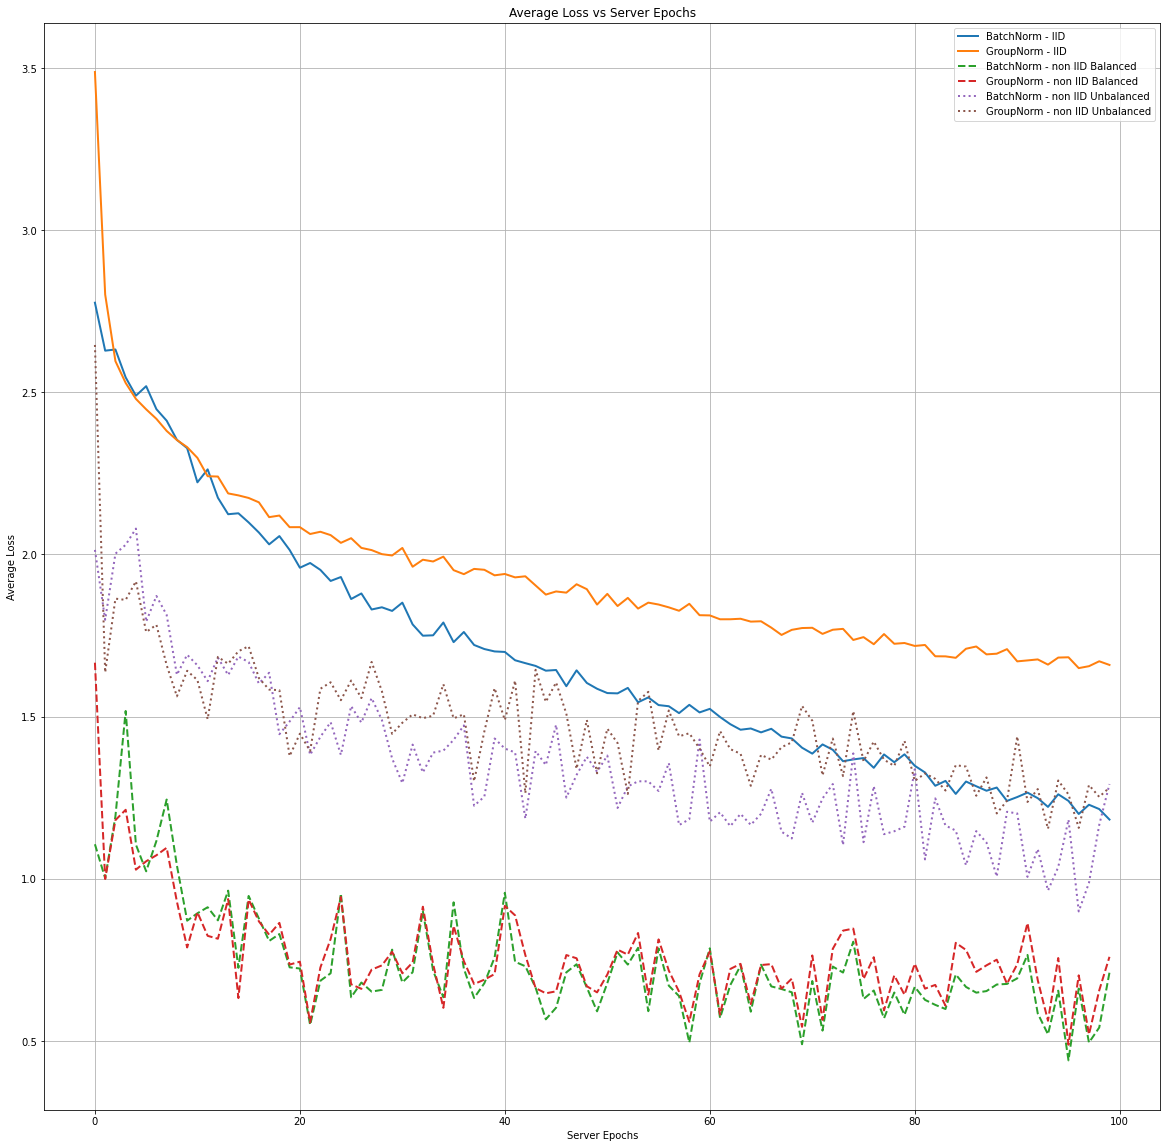

In [6]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.plot(range(len(train_loss_batchNorm_iid1_unbalanced0)), train_loss_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - IID")
ax.plot(range(len(train_loss_groupNorm_iid1_unbalanced0)), train_loss_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - IID")

ax.plot(range(len(train_loss_batchNorm_iid0_unbalanced0)), train_loss_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="BatchNorm - non IID Balanced")
ax.plot(range(len(train_loss_groupNorm_iid0_unbalanced0)), train_loss_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="GroupNorm - non IID Balanced")

ax.plot(range(len(train_loss_batchNorm_iid0_unbalanced1)), train_loss_batchNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="BatchNorm - non IID Unbalanced")
ax.plot(range(len(train_loss_groupNorm_iid0_unbalanced1)), train_loss_groupNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="GroupNorm - non IID Unbalanced")


plt.title("Average Loss vs Server Epochs")
plt.ylabel('Average Loss')
plt.xlabel('Server Epochs')

ax.legend()
ax.grid()

# plt.savefig("fedAVG_results/fedAVG_summary_results_loss.png")
plt.savefig("fedAVG_results/new_random_seed/fedAVG_summary_results_loss.png")

plt.show()

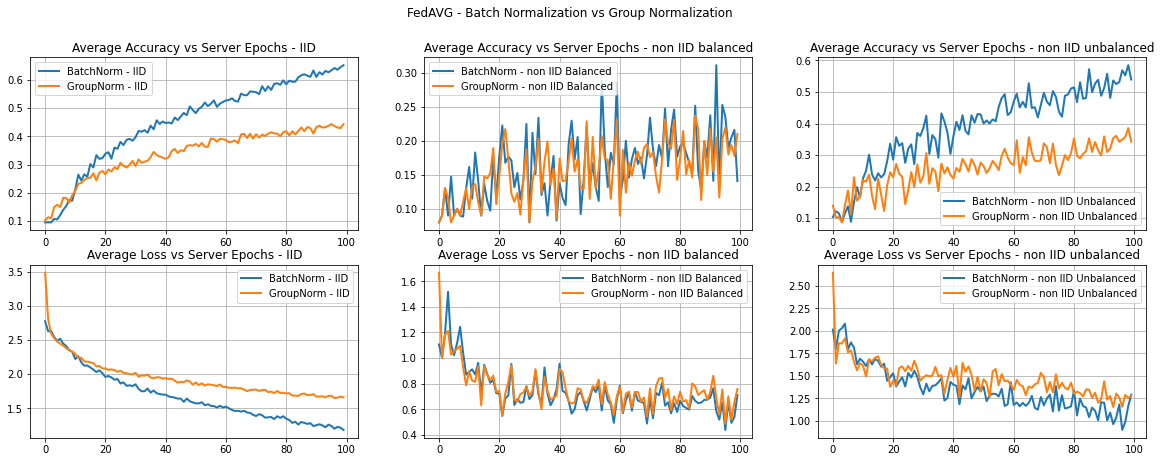

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(20, 7))

ax[0][0].plot(range(len(train_acc_batchNorm_iid1_unbalanced0)), train_acc_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - IID")
ax[0][0].plot(range(len(train_acc_groupNorm_iid1_unbalanced0)), train_acc_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - IID")

ax[0][1].plot(range(len(train_acc_batchNorm_iid0_unbalanced0)), train_acc_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - non IID Balanced")
ax[0][1].plot(range(len(train_acc_groupNorm_iid0_unbalanced0)), train_acc_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - non IID Balanced")

ax[0][2].plot(range(len(train_acc_batchNorm_iid0_unbalanced1)), train_acc_batchNorm_iid0_unbalanced1, linewidth=2, linestyle='-', label="BatchNorm - non IID Unbalanced")
ax[0][2].plot(range(len(train_acc_groupNorm_iid0_unbalanced1)), train_acc_groupNorm_iid0_unbalanced1, linewidth=2, linestyle='-', label="GroupNorm - non IID Unbalanced")

ax[1][0].plot(range(len(train_loss_batchNorm_iid1_unbalanced0)), train_loss_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - IID")
ax[1][0].plot(range(len(train_loss_groupNorm_iid1_unbalanced0)), train_loss_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - IID")

ax[1][1].plot(range(len(train_loss_batchNorm_iid0_unbalanced0)), train_loss_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - non IID Balanced")
ax[1][1].plot(range(len(train_loss_groupNorm_iid0_unbalanced0)), train_loss_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - non IID Balanced")

ax[1][2].plot(range(len(train_loss_batchNorm_iid0_unbalanced1)), train_loss_batchNorm_iid0_unbalanced1, linewidth=2, linestyle='-', label="BatchNorm - non IID Unbalanced")
ax[1][2].plot(range(len(train_loss_groupNorm_iid0_unbalanced1)), train_loss_groupNorm_iid0_unbalanced1, linewidth=2, linestyle='-', label="GroupNorm - non IID Unbalanced")


ax[0][0].title.set_text("Average Accuracy vs Server Epochs - IID")
ax[0][1].title.set_text("Average Accuracy vs Server Epochs - non IID balanced")
ax[0][2].title.set_text("Average Accuracy vs Server Epochs - non IID unbalanced")
ax[1][0].title.set_text("Average Loss vs Server Epochs - IID")
ax[1][1].title.set_text("Average Loss vs Server Epochs - non IID balanced")
ax[1][2].title.set_text("Average Loss vs Server Epochs - non IID unbalanced")

plt.suptitle('FedAVG - Batch Normalization vs Group Normalization')

ax[0][0].legend()
ax[0][0].grid()
ax[0][1].legend()
ax[0][1].grid()
ax[0][2].legend()
ax[0][2].grid()
ax[1][0].legend()
ax[1][0].grid()
ax[1][1].legend()
ax[1][1].grid()
ax[1][2].legend()
ax[1][2].grid()

# plt.savefig("fedAVG_results/fedAVG_summary_results.png")
plt.savefig("fedAVG_results/new_random_seed/fedAVG_summary_results.png")

plt.show()

In [2]:
# FedGKT
data_batchNorm_iid1_unbalanced0 = pd.read_csv("fedGKT_results/ResNet50_BatchNorm_10_lr_[0.001]_C[0.1]_iid[1]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[0].csv")
data_batchNorm_iid0_unbalanced0 = pd.read_csv("fedGKT_results/ResNet50_BatchNorm_10_lr_[0.001]_C[0.1]_iid[0]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[0].csv")
data_batchNorm_iid0_unbalanced1 = pd.read_csv("fedGKT_results/ResNet50_BatchNorm_10_lr_[0.001]_C[0.1]_iid[0]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[1].csv")
data_groupNorm_iid1_unbalanced0 = pd.read_csv("fedGKT_results/ResNet50_GroupNorm_10_lr_[0.001]_C[0.1]_iid[1]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[0].csv")
data_groupNorm_iid0_unbalanced0 = pd.read_csv("fedGKT_results/ResNet50_GroupNorm_10_lr_[0.001]_C[0.1]_iid[0]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[0].csv")
data_groupNorm_iid0_unbalanced1 = pd.read_csv("fedGKT_results/ResNet50_GroupNorm_10_lr_[0.001]_C[0.1]_iid[0]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[1].csv")

In [6]:
# BatchNorm
train_loss_batchNorm_iid1_unbalanced0 = list(data_batchNorm_iid1_unbalanced0["train_loss"].values)
train_acc_batchNorm_iid1_unbalanced0 = list(data_batchNorm_iid1_unbalanced0["train_accuracy"].values)

train_loss_batchNorm_iid0_unbalanced0 = list(data_batchNorm_iid0_unbalanced0["train_loss"].values)
train_acc_batchNorm_iid0_unbalanced0 = list(data_batchNorm_iid0_unbalanced0["train_accuracy"].values)

train_loss_batchNorm_iid0_unbalanced1 = list(data_batchNorm_iid0_unbalanced1["train_loss"].values)
train_acc_batchNorm_iid0_unbalanced1 = list(data_batchNorm_iid0_unbalanced1["train_accuracy"].values)

# GroupNorm
train_loss_groupNorm_iid1_unbalanced0 = list(data_groupNorm_iid1_unbalanced0["train_loss"].values)
train_acc_groupNorm_iid1_unbalanced0 = list(data_groupNorm_iid1_unbalanced0["train_accuracy"].values)
#
train_loss_groupNorm_iid0_unbalanced0 = list(data_groupNorm_iid0_unbalanced0["train_loss"].values)
train_acc_groupNorm_iid0_unbalanced0 = list(data_groupNorm_iid0_unbalanced0["train_accuracy"].values)

train_loss_groupNorm_iid0_unbalanced1 = list(data_groupNorm_iid0_unbalanced1["train_loss"].values)
train_acc_groupNorm_iid0_unbalanced1 = list(data_groupNorm_iid0_unbalanced1["train_accuracy"].values)

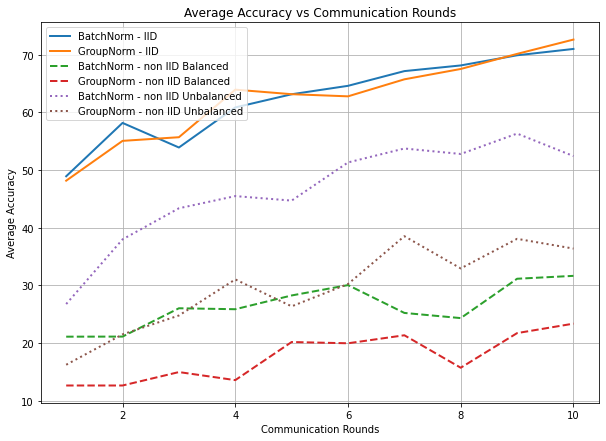

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(range(1, len(train_acc_batchNorm_iid1_unbalanced0)+1), train_acc_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - IID")
ax.plot(range(1, len(train_acc_groupNorm_iid1_unbalanced0)+1), train_acc_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - IID")

ax.plot(range(1, len(train_acc_batchNorm_iid0_unbalanced0)+1), train_acc_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="BatchNorm - non IID Balanced")
ax.plot(range(1, len(train_acc_groupNorm_iid0_unbalanced0)+1), train_acc_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="GroupNorm - non IID Balanced")

ax.plot(range(1, len(train_acc_batchNorm_iid0_unbalanced1)+1), train_acc_batchNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="BatchNorm - non IID Unbalanced")
ax.plot(range(1, len(train_acc_groupNorm_iid0_unbalanced1)+1), train_acc_groupNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="GroupNorm - non IID Unbalanced")


plt.title("Average Accuracy vs Communication Rounds")
plt.ylabel('Average Accuracy')
plt.xlabel('Communication Rounds')

ax.legend()
ax.grid()

# file_name = '{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}]_loss.png'.format(
#     "ResNet50", n_epochs, lr, frac, iid,
#     local_epochs, local_batch_size)
plt.savefig("fedGKT_results/fedGKT_summary_results_acc.png")

plt.show()

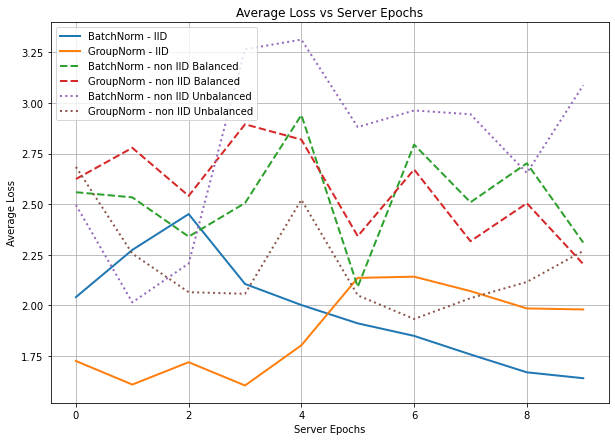

In [15]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(range(len(train_loss_batchNorm_iid1_unbalanced0)), train_loss_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - IID")
ax.plot(range(len(train_loss_groupNorm_iid1_unbalanced0)), train_loss_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - IID")

ax.plot(range(len(train_loss_batchNorm_iid0_unbalanced0)), train_loss_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="BatchNorm - non IID Balanced")
ax.plot(range(len(train_loss_groupNorm_iid0_unbalanced0)), train_loss_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="GroupNorm - non IID Balanced")

ax.plot(range(len(train_loss_batchNorm_iid0_unbalanced1)), train_loss_batchNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="BatchNorm - non IID Unbalanced")
ax.plot(range(len(train_loss_groupNorm_iid0_unbalanced1)), train_loss_groupNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="GroupNorm - non IID Unbalanced")


plt.title("Average Loss vs Server Epochs")
plt.ylabel('Average Loss')
plt.xlabel('Server Epochs')

ax.legend()
ax.grid()

plt.savefig("fedGKT_results/fedGKT_summary_results_loss.png")

plt.show()

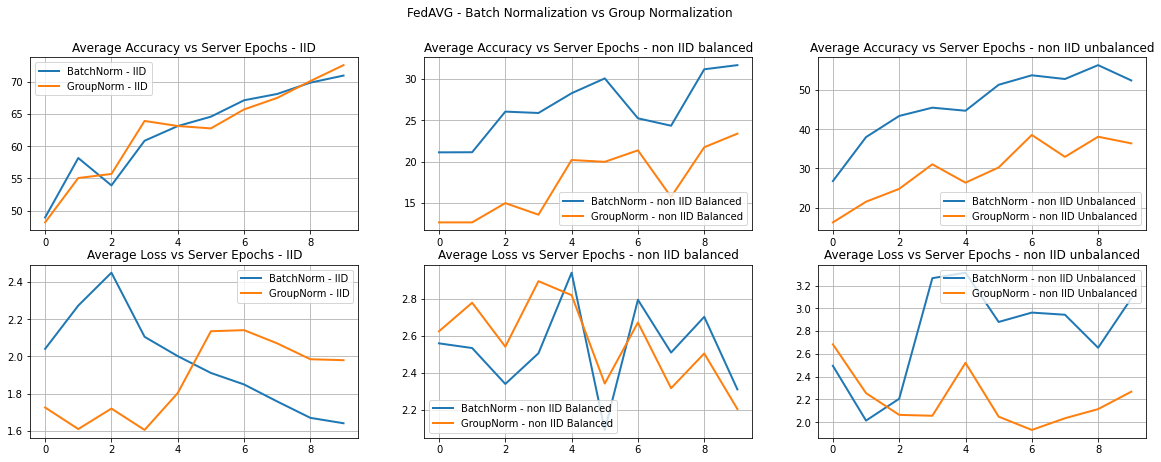

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(20, 7))

ax[0][0].plot(range(len(train_acc_batchNorm_iid1_unbalanced0)), train_acc_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - IID")
ax[0][0].plot(range(len(train_acc_groupNorm_iid1_unbalanced0)), train_acc_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - IID")

ax[0][1].plot(range(len(train_acc_batchNorm_iid0_unbalanced0)), train_acc_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - non IID Balanced")
ax[0][1].plot(range(len(train_acc_groupNorm_iid0_unbalanced0)), train_acc_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - non IID Balanced")

ax[0][2].plot(range(len(train_acc_batchNorm_iid0_unbalanced1)), train_acc_batchNorm_iid0_unbalanced1, linewidth=2, linestyle='-', label="BatchNorm - non IID Unbalanced")
ax[0][2].plot(range(len(train_acc_groupNorm_iid0_unbalanced1)), train_acc_groupNorm_iid0_unbalanced1, linewidth=2, linestyle='-', label="GroupNorm - non IID Unbalanced")

ax[1][0].plot(range(len(train_loss_batchNorm_iid1_unbalanced0)), train_loss_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - IID")
ax[1][0].plot(range(len(train_loss_groupNorm_iid1_unbalanced0)), train_loss_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - IID")

ax[1][1].plot(range(len(train_loss_batchNorm_iid0_unbalanced0)), train_loss_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - non IID Balanced")
ax[1][1].plot(range(len(train_loss_groupNorm_iid0_unbalanced0)), train_loss_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - non IID Balanced")

ax[1][2].plot(range(len(train_loss_batchNorm_iid0_unbalanced1)), train_loss_batchNorm_iid0_unbalanced1, linewidth=2, linestyle='-', label="BatchNorm - non IID Unbalanced")
ax[1][2].plot(range(len(train_loss_groupNorm_iid0_unbalanced1)), train_loss_groupNorm_iid0_unbalanced1, linewidth=2, linestyle='-', label="GroupNorm - non IID Unbalanced")


ax[0][0].title.set_text("Average Accuracy vs Server Epochs - IID")
ax[0][1].title.set_text("Average Accuracy vs Server Epochs - non IID balanced")
ax[0][2].title.set_text("Average Accuracy vs Server Epochs - non IID unbalanced")
ax[1][0].title.set_text("Average Loss vs Server Epochs - IID")
ax[1][1].title.set_text("Average Loss vs Server Epochs - non IID balanced")
ax[1][2].title.set_text("Average Loss vs Server Epochs - non IID unbalanced")

plt.suptitle('FedGKT - Batch Normalization vs Group Normalization')

ax[0][0].legend()
ax[0][0].grid()
ax[0][1].legend()
ax[0][1].grid()
ax[0][2].legend()
ax[0][2].grid()
ax[1][0].legend()
ax[1][0].grid()
ax[1][1].legend()
ax[1][1].grid()
ax[1][2].legend()
ax[1][2].grid()

plt.savefig("fedGKT_results/fedGKT_summary_results.png")

plt.show()

In [22]:
# centralized baseline
data_batchNorm = pd.read_csv("centralized_baseline_results/loss_SGD_batchNorm_acc92.csv", names=["epochs", "train_loss", "valid_loss", "train_acc", "valid_acc"])
data_groupNorm = pd.read_csv("centralized_baseline_results/loss_SGD_groupNorm_4_acc87.csv", names=["epochs", "train_loss", "valid_loss", "train_acc", "valid_acc"])

In [23]:
train_loss_batchNorm = list(data_batchNorm["valid_loss"].values)
train_acc_batchNorm = list(data_batchNorm["valid_acc"].values)
train_loss_groupNorm = list(data_groupNorm["valid_loss"].values)
train_acc_groupNorm = list(data_groupNorm["valid_acc"].values)

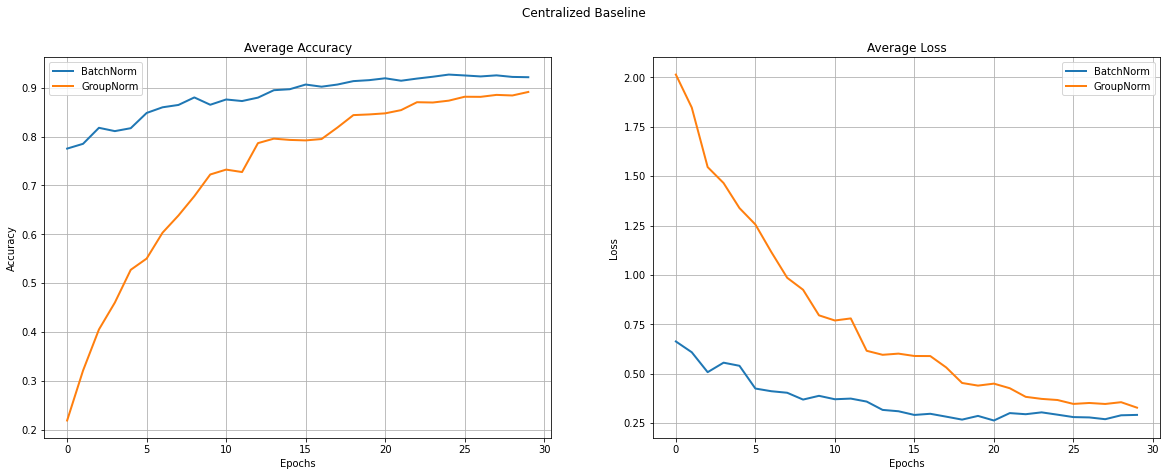

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].plot(range(len(train_acc_batchNorm)), train_acc_batchNorm, linewidth=2, linestyle='-', label="BatchNorm")
ax[0].plot(range(len(train_acc_groupNorm)), train_acc_groupNorm, linewidth=2, linestyle='-', label="GroupNorm")

ax[1].plot(range(len(train_loss_batchNorm)), train_loss_batchNorm, linewidth=2, linestyle='-', label="BatchNorm")
ax[1].plot(range(len(train_loss_groupNorm)), train_loss_groupNorm, linewidth=2, linestyle='-', label="GroupNorm")

ax[0].title.set_text("Average Accuracy")
ax[1].title.set_text("Average Loss")
# plt.ylabel('Average Accuracy')
# plt.xlabel('Server Epochs')

plt.suptitle('Centralized Baseline')

ax[0].set(xlabel="Epochs", ylabel="Accuracy")
ax[1].set(xlabel="Epochs", ylabel="Loss")

ax[0].legend()
ax[0].grid()
ax[1].legend()
ax[1].grid()

# file_name = '{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}]_loss.png'.format(
#     "ResNet50", n_epochs, lr, frac, iid,
#     local_epochs, local_batch_size)
plt.savefig("centralized_baseline_results/summary_results.png")

plt.show()

In [25]:
# FedAVG 500 epochs
data_batchNorm = pd.read_csv("fedAVG_results/ResNet50_BatchNorm_500_lr_[0.001]_C[0.1]_iid[1]_E[1]_B[10]_sgd_CrossEntropyLoss.csv")
data_groupNorm = pd.read_csv("fedAVG_results/ResNet50_GroupNorm_500_lr_[0.001]_C[0.1]_iid[1]_E[1]_B[10]_sgd_CrossEntropyLoss.csv")
train_loss_batchNorm = list(data_batchNorm["train_loss"].values)
train_acc_batchNorm = list(data_batchNorm["train_accuracy"].values)
train_loss_groupNorm = list(data_groupNorm["train_loss"].values)
train_acc_groupNorm = list(data_groupNorm["train_accuracy"].values)

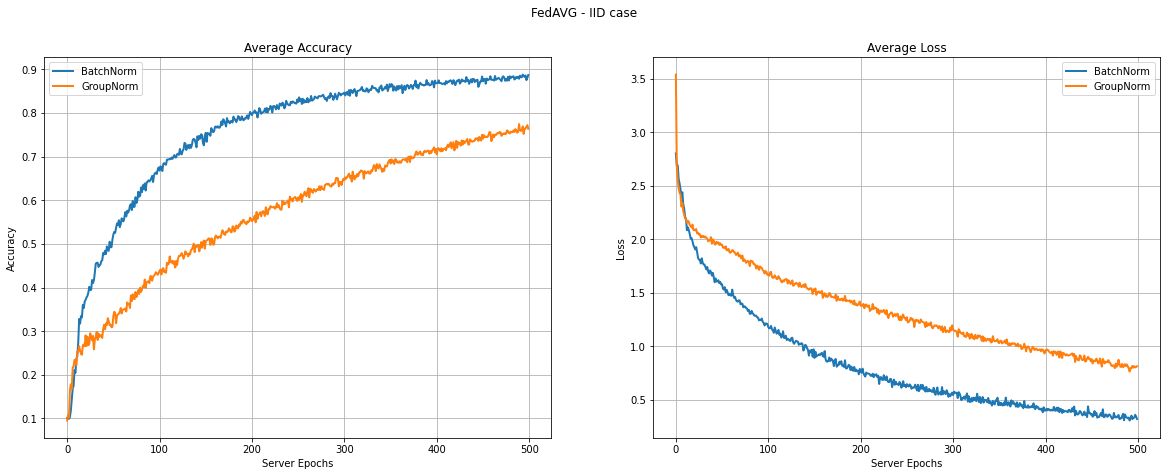

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].plot(range(len(train_acc_batchNorm)), train_acc_batchNorm, linewidth=2, linestyle='-', label="BatchNorm")
ax[0].plot(range(len(train_acc_groupNorm)), train_acc_groupNorm, linewidth=2, linestyle='-', label="GroupNorm")

ax[1].plot(range(len(train_loss_batchNorm)), train_loss_batchNorm, linewidth=2, linestyle='-', label="BatchNorm")
ax[1].plot(range(len(train_loss_groupNorm)), train_loss_groupNorm, linewidth=2, linestyle='-', label="GroupNorm")

ax[0].title.set_text("Average Accuracy")
ax[1].title.set_text("Average Loss")
# plt.ylabel('Average Accuracy')
# plt.xlabel('Server Epochs')

plt.suptitle('FedAVG - IID case')

ax[0].set(xlabel="Server Epochs", ylabel="Accuracy")
ax[1].set(xlabel="Server Epochs", ylabel="Loss")

ax[0].legend()
ax[0].grid()
ax[1].legend()
ax[1].grid()

# file_name = '{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}]_loss.png'.format(
#     "ResNet50", n_epochs, lr, frac, iid,
#     local_epochs, local_batch_size)
plt.savefig("fedAVG_results/iid_500epochs.png")

plt.show()